# Transfer learning 
In this notebook, we will use the follwoing tools:
- Tensorflow (using tensorflow.keras to make life easier)
- classification-models (a library of pre-trained models)

Our task is to transfer a model from classifying the imagenet dataset to a much smaller dataset, CIFAR-10.

There are some key differences:
- imagenet has 1.3 million examples across 1000 classes; CIFAR-10 has 60,000 examples across 10 classes
- Images in imagenet can be any size, but usually a 224x224 patch containing the object is cropped out; CIFAR-10 is 32x32 with the object in the centre


Our task is to take a model from the classification zoo and use a technique called transfer learning to apply it to the CIFAR dataset.

We'll break it down into several steps

In [3]:
## Install some packages if we don't already have them
!pip3 install image-classifiers==1.0.0b1

  Cache entry deserialization failed, entry ignored


In [5]:
## Do the matplotlib magic
%matplotlib inline

In [15]:
## Now, lets import keras, the classifiers library, some bits of scikit-learn and matplotlib
import tensorflow.keras as keras
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

(50000, 32, 32, 3) (10000, 32, 32, 3)


Text(0.5, 1.0, 'Class deer')

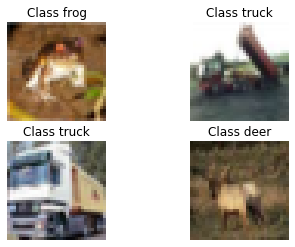

In [27]:
## import the CIFAR-10 dataset from keras, then inspect it and visualise some of the pictures
from tensorflow.keras.datasets import cifar10

## cifar10 is pre split with a standard test dataset
(img_train, label_train), (img_test, label_test) = cifar10.load_data()
## How big is everything?
print(img_train.shape, img_test.shape)

cifar10_decode = {0:"airplane", 1:"automobile", 2:"bird", 3:"cat", 4:"deer", 5:"dog", 6:"frog", 7:"horse", 8:"ship", 9:"truck"}

## Lets look at the first four images
fig, axes = plt.subplots(2,2)

## turn off axis labels because we're showing images
[a.set_axis_off() for a in axes.flatten()]


axes[0,0].imshow(img_train[0,...])
axes[0,0].set_title(f"Class {cifar10_decode[label_train[0][0]]}")

axes[1,0].imshow(img_train[1,...])
axes[1,0].set_title(f"Class {cifar10_decode[label_train[1][0]]}")

axes[0,1].imshow(img_train[2,...])
axes[0,1].set_title(f"Class {cifar10_decode[label_train[2][0]]}")

axes[1,1].imshow(img_train[3,...])
axes[1,1].set_title(f"Class {cifar10_decode[label_train[3][0]]}")
